# Time series data ML flow

## ML flow:

1. Data Ingesiton

2. EDA of the data

3. Processing of the data

4. Model building

5. Model evalution

## Data Ingestion

1.) Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

2.) Load the Data.

3.) Load the Time Series Data into a pandas dataframe.

4.) Set the datetime column as the index of the dataframe.

5.) Check the datatype of the index and convert it to datetime if necessary.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving TSLA.CSV to TSLA.CSV


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('TSLA.CSV')

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


## Univariate time series
Univariate time series forecasting is the process of predicting future values of a single variable.

A univariate time series is a sequence of measurements of a single variable over time.

In [13]:
# This is a univariate time series data

stock_data = df[['Date', 'Close']]

In [14]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [15]:
print(stock_data.head())

         Date      Close
0  2019-05-21  41.015999
1  2019-05-22  38.546001
2  2019-05-23  39.098000
3  2019-05-24  38.125999
4  2019-05-28  37.740002


# Why converting 'Date' column in an index?

1.) We can easily retrieve the data.

2.) Visualization is easy.

3.) The libraries we need(scipy stats model) has been designed in such a way that it required 'Date' column as an index.

In [16]:
# Converting the 'Date' column as index

stock_data = stock_data.set_index('Date')

In [17]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# EDA Steps:

1.) Summary Statistics
- a.) Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2.) Visualize the Time Series Data

- a.) Plot the Time Series data

- b.) Plot the rolling mean and rolling standard deviation of the Time Series data.

- c.) Decompose the Time Series Data check for any trends, seasonality, and Noise.

- d.) Plot the decomposed components to get a better understanding of the Time Series data.

3.) Stationarity Check

- a.) Check for stationarity.

- b.) Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4.) Outlier Detection

- a.) Detect and handle outliers using statistical methods or machine learning techniques.

5.) Check for Autocorrelation

- a.) Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


# Step1: Summary Statistics

In [18]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

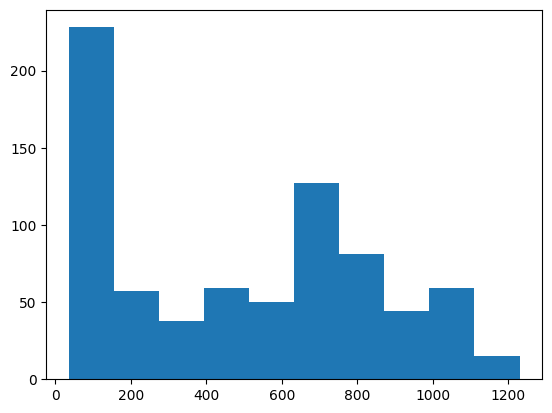

In [19]:
plt.hist(stock_data['Close'])

# Step2: Visualize the Time Series Data

### a.) Plotting time series data (df_close here)

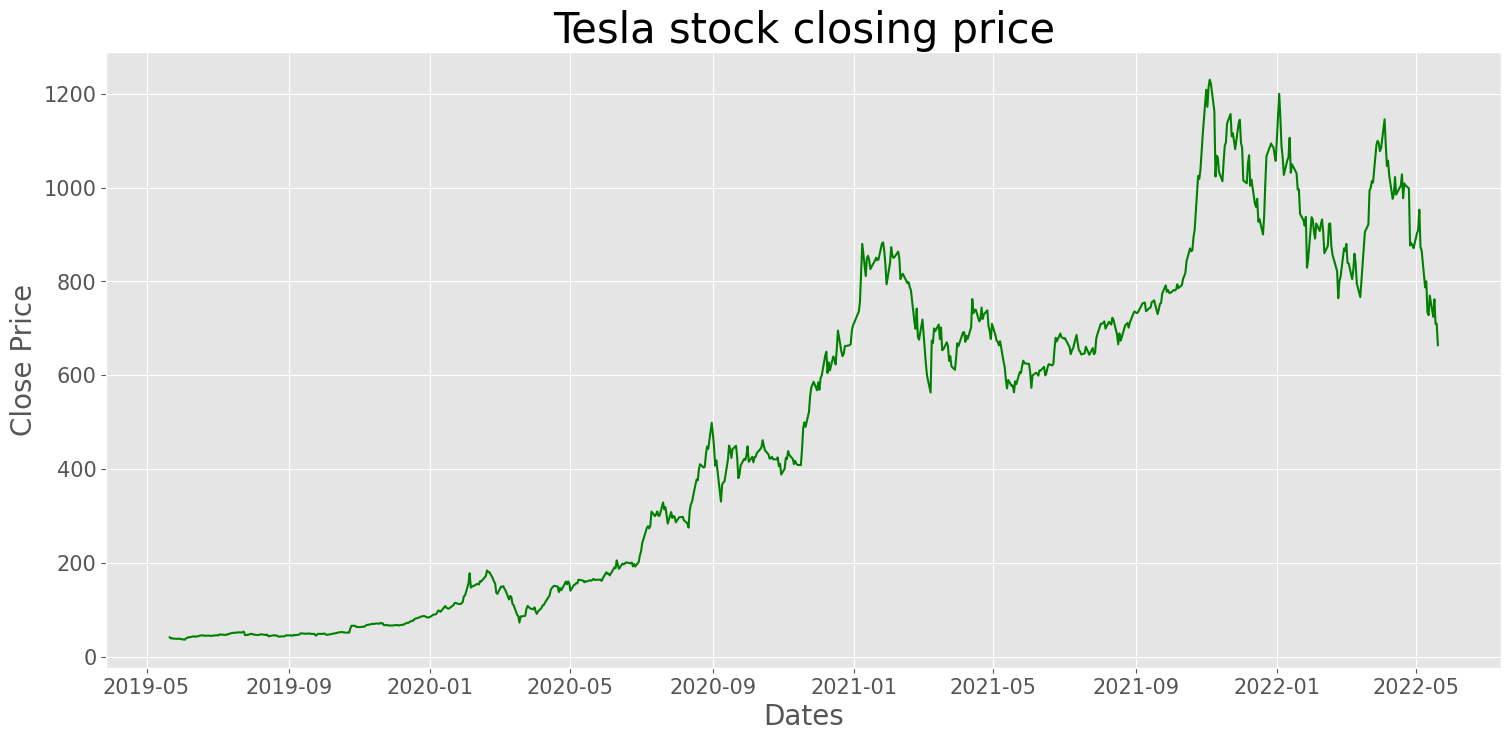

In [21]:
# Date Vs Closing Price graph

plt.style.use('ggplot')
plt.figure(figsize = (18,8))
plt.grid(True)

plt.title('Tesla stock closing price', fontsize = 30)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Close Price', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'], stock_data['Close'], color = 'green')
plt.show()

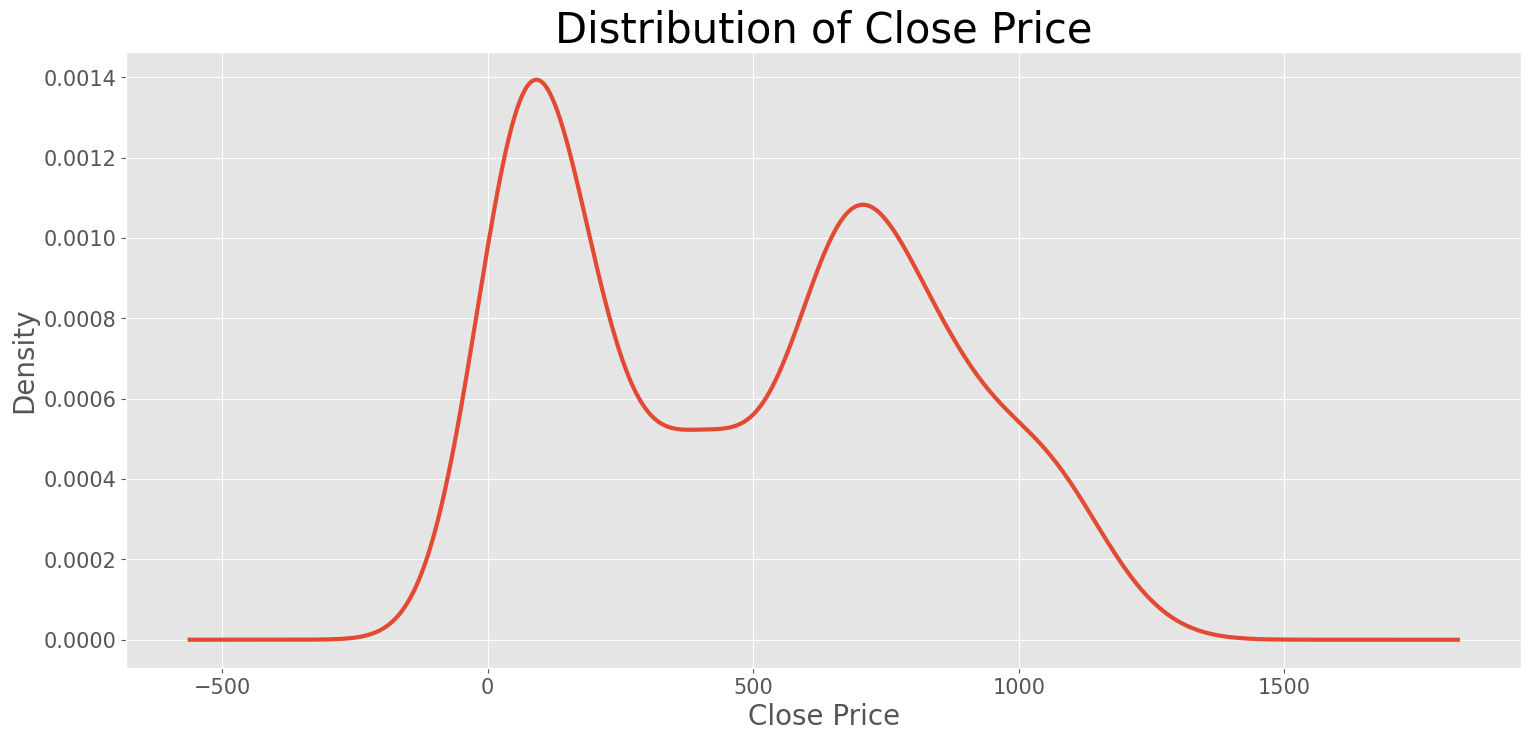

In [23]:
# Distribution of the close price

df_close = df['Close']              # Closing price, will be used frequently

df_close.plot(kind = 'kde', figsize = (18,8), linewidth = 3)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.ylabel('Density', fontsize = 20)
plt.xlabel('Close Price', fontsize = 20)
plt.title('Distribution of Close Price', fontsize = 30)
plt.grid(True)
plt.show()

b.) Plot the rolling mean and rolling standard deviation of the Time Series data.

In [24]:
rolmean = df_close.rolling(48).mean()

In [25]:
rolstd = df_close.rolling(48).std()

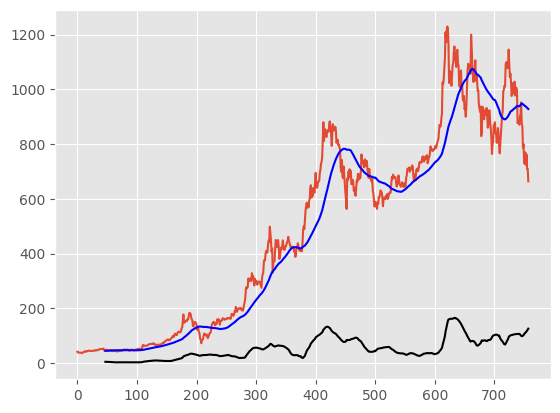

In [27]:
plt.plot(df_close)

plt.plot(rolmean, color = 'blue')

plt.plot(rolstd, color = 'black')

## c.) Decompose the Time Series Data check for any trends, seasonality, and Noise.

There are 2 types of Decomposition in Tinme series data:

1.) Additive - Linear, constatnt variation

2.) Multiplicative - Non linear, Noises

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_close, period = 12)

In [29]:
result.seasonal

,seasonal
0,-2.346452
1,3.768884
2,-0.777006
3,-0.654226
4,-2.737845
...,...
753,2.149519
754,1.323680
755,1.837638
756,-2.346452


### d.) Plot the decomposed components to get a better understanding of the Time Series data.

<Figure size 2000x1000 with 0 Axes>

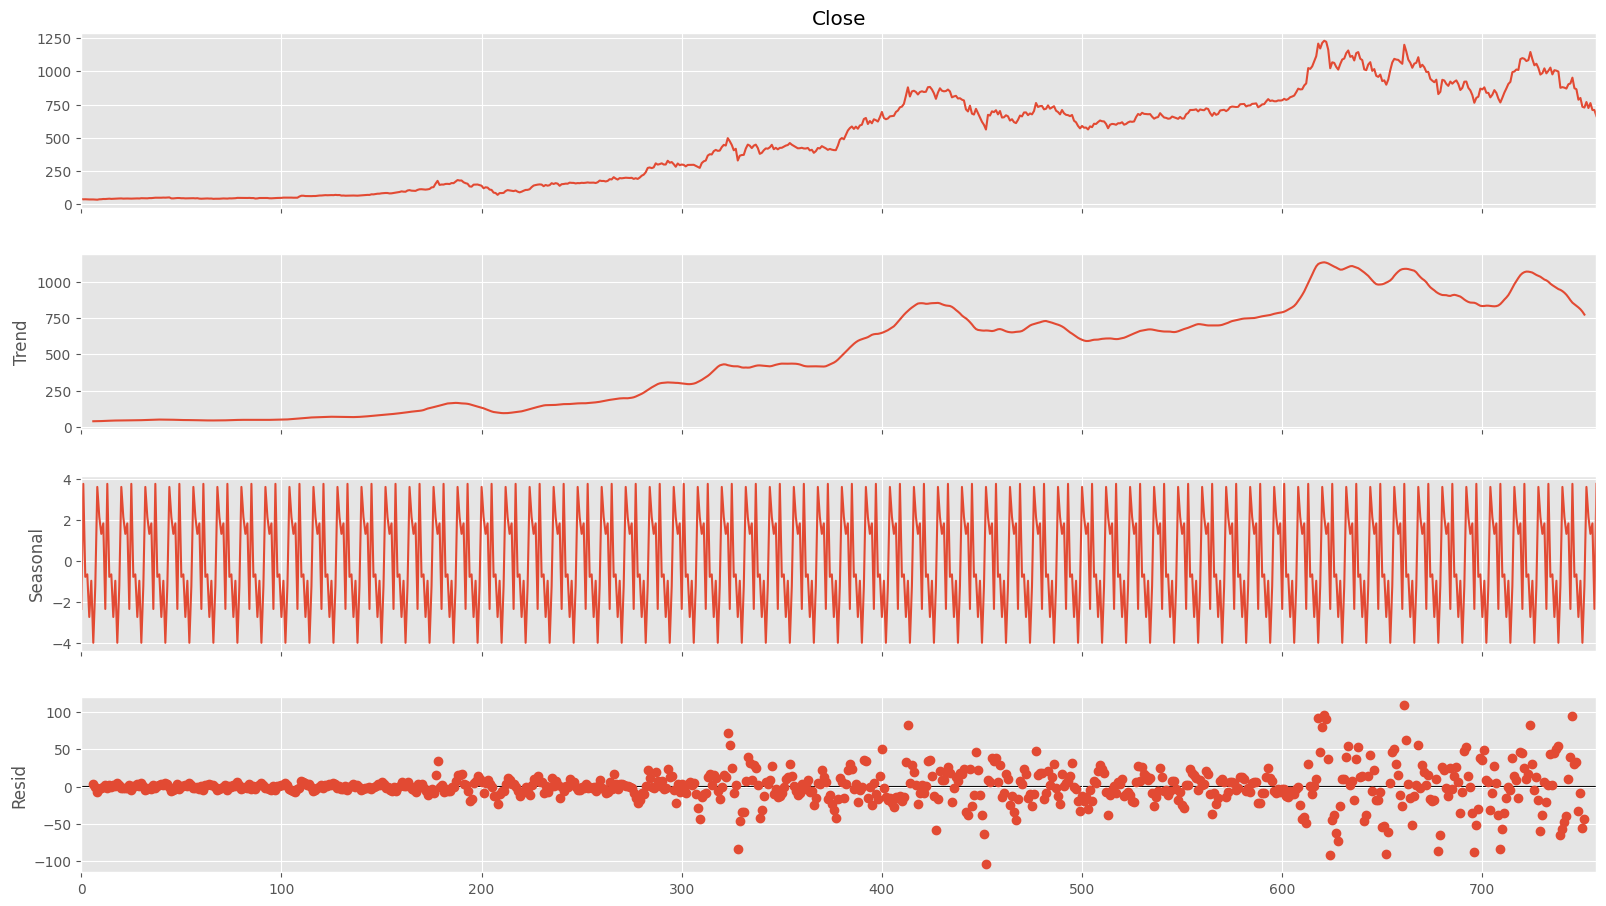

In [20]:
fig = plt.figure(figsize = (20,10))
fig = result.plot()
fig.set_size_inches(18,10)

*NOTE:* As there is non linear relationship and lots of noises, I am taking **multiplicative decomposition**.

In [31]:
result1 = seasonal_decompose(stock_data[['Close']], period = 12, model = 'multiplicative')

<Figure size 2000x1000 with 0 Axes>

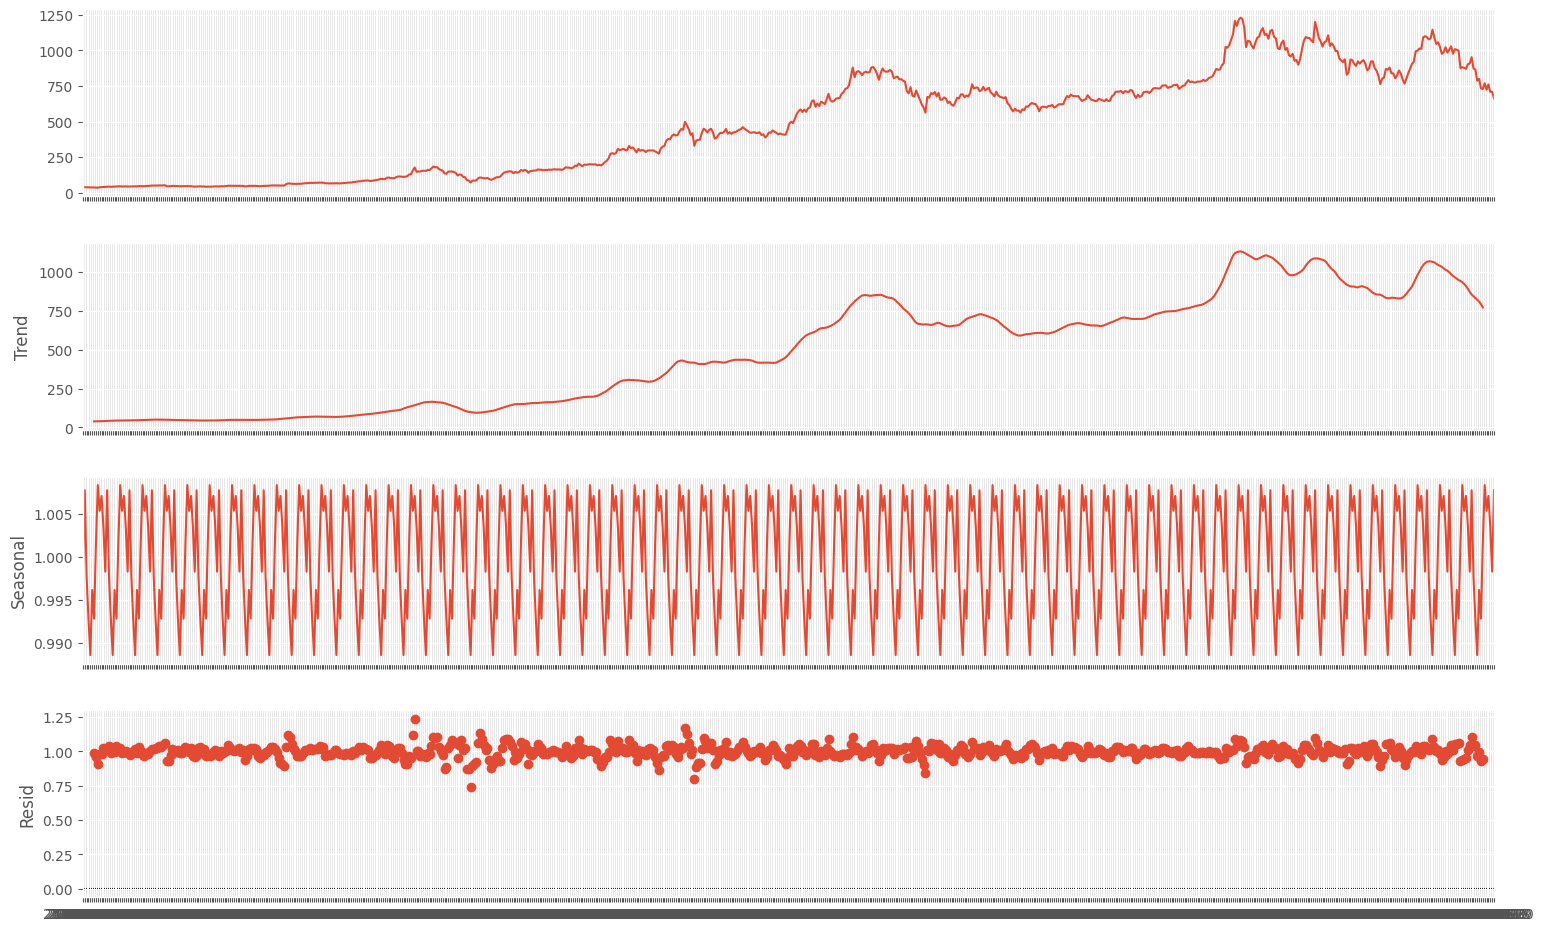

In [32]:
fig1 = plt.figure(figsize=(20,10))
fig1 = result1.plot()
fig1.set_size_inches(18,10)

# Step3:  Stationarity Check

### Checking Stationarity using the ADF Test(Ada Fuller Test)

In [33]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df_close)

In [34]:
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [35]:
# Mapping these stats value with their key

pd.Series(adft[0:4], index = ['test stats', 'p-value', 'lag', 'data points'])

,0
test stats,-1.363009
p-value,0.599876
lag,9.000000
data points,748.000000


## NOTE:

p-value < 0.05 → Data is stationary.

p-value ≥ 0.05 → Difference your data or apply transformations.

Here, our Null Hypotheseis(H0) = Data is Non stationary.

p-value = 0.59 > 0.05, i.e , [H0 IS TRUE] and our stock Data is non-stationary.


## Standarization

In [36]:
# Scale Your Data: Normalize or standardize your dataset:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_close_scaled = scaler.fit_transform(df_close.values.reshape(-1,1))


In [37]:
df_close_scaled

array([[-1.25951007],
       [-1.26650867],
       [-1.26494462],
       [-1.26769872],
       [-1.26879243],
       [-1.26813507],
       [-1.26906444],
       [-1.27079851],
       [-1.27430632],
       [-1.26601565],
       [-1.26432125],
       [-1.25901705],
       [-1.25983874],
       [-1.25508989],
       [-1.25269847],
       [-1.2571413 ],
       [-1.2545062 ],
       [-1.25393385],
       [-1.24820462],
       [-1.24836896],
       [-1.24741126],
       [-1.25127041],
       [-1.25000102],
       [-1.24899232],
       [-1.25119108],
       [-1.25146875],
       [-1.24944567],
       [-1.24909432],
       [-1.24699191],
       [-1.24847663],
       [-1.24261141],
       [-1.24363145],
       [-1.2451955 ],
       [-1.24535418],
       [-1.24033331],
       [-1.24051465],
       [-1.23684251],
       [-1.23207099],
       [-1.23270568],
       [-1.23130029],
       [-1.23204832],
       [-1.22941888],
       [-1.2308356 ],
       [-1.22829117],
       [-1.22562207],
       [-1

### Stationarity check test(ADF) in a single function

In [38]:
def check_stationarity(timeseries):

  # Determining rolling statistics
  rolmean = timeseries.rolling(48).mean()
  rolstd = timeseries.rolling(48).std()

  # Plotting rolling statistics
  plt.plot(timeseries, color = 'green', label = 'Original')
  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
  plt.plot(rolstd, color = 'blue', label = 'Rolling Std')
  plt.show()

  print("Result of Ada Fuller(ADF) test: ")
  adft = adfuller(timeseries, autolag = 'AIC')

  # Printing test statistics(mapping the key and values)
  output = pd.Series(adft[0:4], index = ['Test statistics',
                                         'p-value',
                                         'no. of lags used',
                                         'no. of observations used'])
  critical_values = adft[4].items()
  for key, values in critical_values:
    output['critical value (%s)'%key] = values

  print(output)


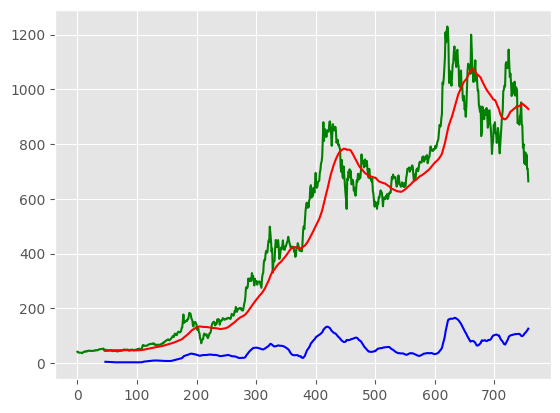

Result of Ada Fuller(ADF) test: 
Test statistics              -1.363009
p-value                       0.599876
no. of lags used              9.000000
no. of observations used    748.000000
critical value (1%)          -3.439123
critical value (5%)          -2.865412
critical value (10%)         -2.568832
dtype: float64


In [29]:
check_stationarity(df_close)

# Step4: Checking for Outliers

<Axes: >

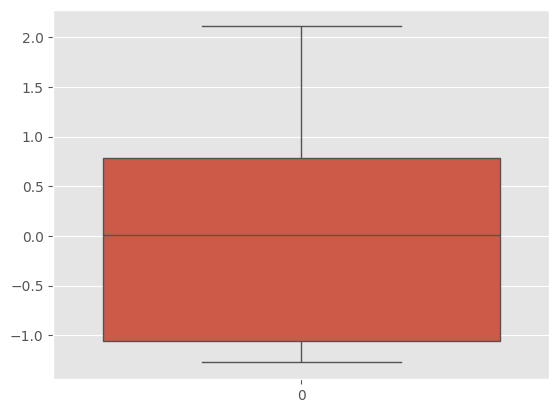

In [39]:
# Boxplot for finding Outliers

sns.boxplot(df_close_scaled)

# Step5: Checking for Autocorrealtion (ACF and PACF)

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

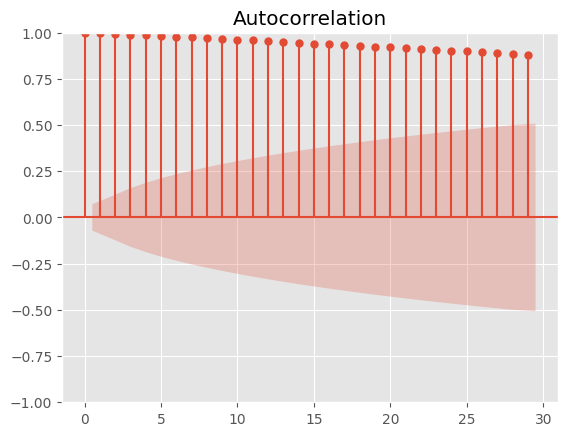

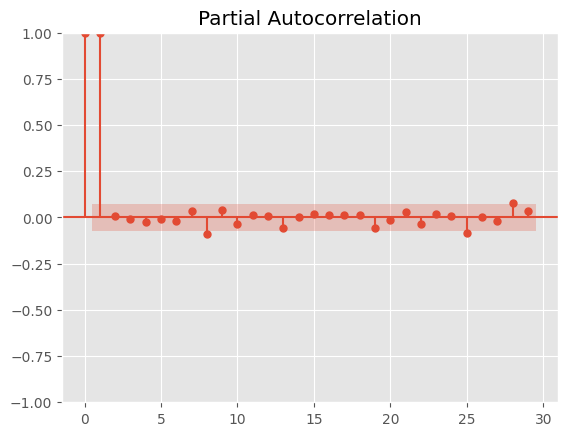

In [41]:
plot_acf(df_close)
plot_pacf(df_close)
plt.show()

**NOTE:** EDA end here

# Model building

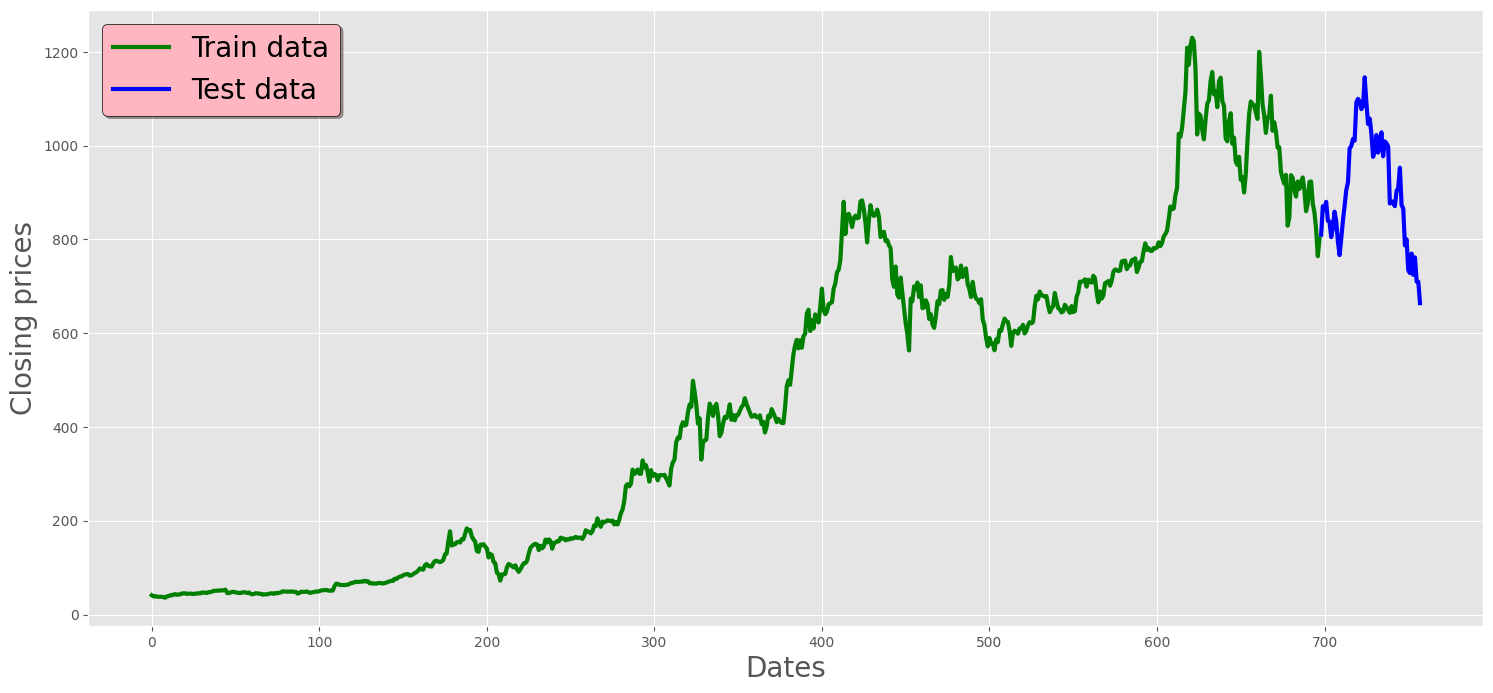

In [42]:
# Train test Splitting

train_data = df_close[0:-60]    # First 698 data
test_data = df_close[-60:]      # Next/ last 60 data

plt.figure(figsize = (18,8))
plt.grid(True)

plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing prices', fontsize = 20)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 3)
plt.plot(test_data, 'blue', label = 'Test data', linewidth = 3)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

In [43]:
train_data.shape, test_data.shape

((698,), (60,))

# Implementing ARIMA model

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
history  = [x for x in train_data]

In [46]:
print(type(train_data), type(history))

<class 'pandas.core.series.Series'> <class 'list'>


In [47]:
ar_model = ARIMA(history, order = (1,1,1))

In [48]:
ar_model

In [49]:
ar_model = ar_model.fit()

In [50]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Fri, 28 Feb 2025   AIC                           6306.700
Time:                        17:16:20   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Resetting the index (required in arima_model_train() )
# To calculate MSE with he predited data, the index must be parallel

test_data.reset_index(drop=True , inplace = True)
test_data

,Close
0,809.869995
1,870.429993
2,864.369995
3,879.890015
4,839.289978
5,838.289978
6,804.580017
7,824.400024
8,858.969971
9,838.299988


In [52]:
ar_model.forecast()[0]

800.2043832076607

In [53]:
mse = mean_squared_error([test_data[0]], ar_model.forecast())

In [54]:
rmse = np.sqrt(mse)

In [55]:
rmse

9.665611909526774

# Model training steps in a function

In [59]:
#train_data_sc = df_close_scaled[0:-60]    # First 698 data
#test_data_sc = df_close_scaled[-60:]      # Next/ last 60 data

In [60]:
def train_arima_model(train_data, test_data, arima_order):
  history = [x for x in train_data]
  predicted_data = list()

  for i in range(len(test_data)):
    model = ARIMA(history, order = arima_order)
    model = model.fit()
    # print(model.mle_retvals)
    pred = model.forecast()[0]
    predicted_data.append(pred)
    history.append(test_data.iloc[i])

  rmse = np.sqrt(mean_squared_error(test_data, predicted_data))
  return rmse, predicted_data


In [61]:
rmse, pred_data = train_arima_model(train_data, test_data, (1,1,1))
rmse

39.554618172209246

# Model Evaluation in a function

In [62]:
def evaluate_model(train_data, test_data, p_values, d_values, q_values):
  best_score, best_conf = float('inf'), None

  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)

        try:
          rmse = train_arima_model(train_data, test_data, order)
          if rmse < best_score:
            best_score, best_conf = rmse, order
            print('ARIMA%s , RMSE= %.3f' % (order, rmse))
        except:
          continue

  print('Best ARIMA%s And its RMSE: %.3f' % (best_conf, best_score))

In [63]:
# Evaluating model
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

evaluate_model(train_data, test_data, p_values, d_values, q_values)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best ARIMANone And its RMSE: inf


**NOTE:** First tiem, when I run thisn code, it was partially giving the result and then error lines but when I rrunt he code again, it is givig me error.

In [64]:
 # Let's say best model is at order = (2,0,0)

 rmse, predicted_data = train_arima_model(train_data, test_data, (2,0,0))
 print("RMSE IS: ", rmse)

RMSE IS:  39.43992944070974


# Visualization of predicted data

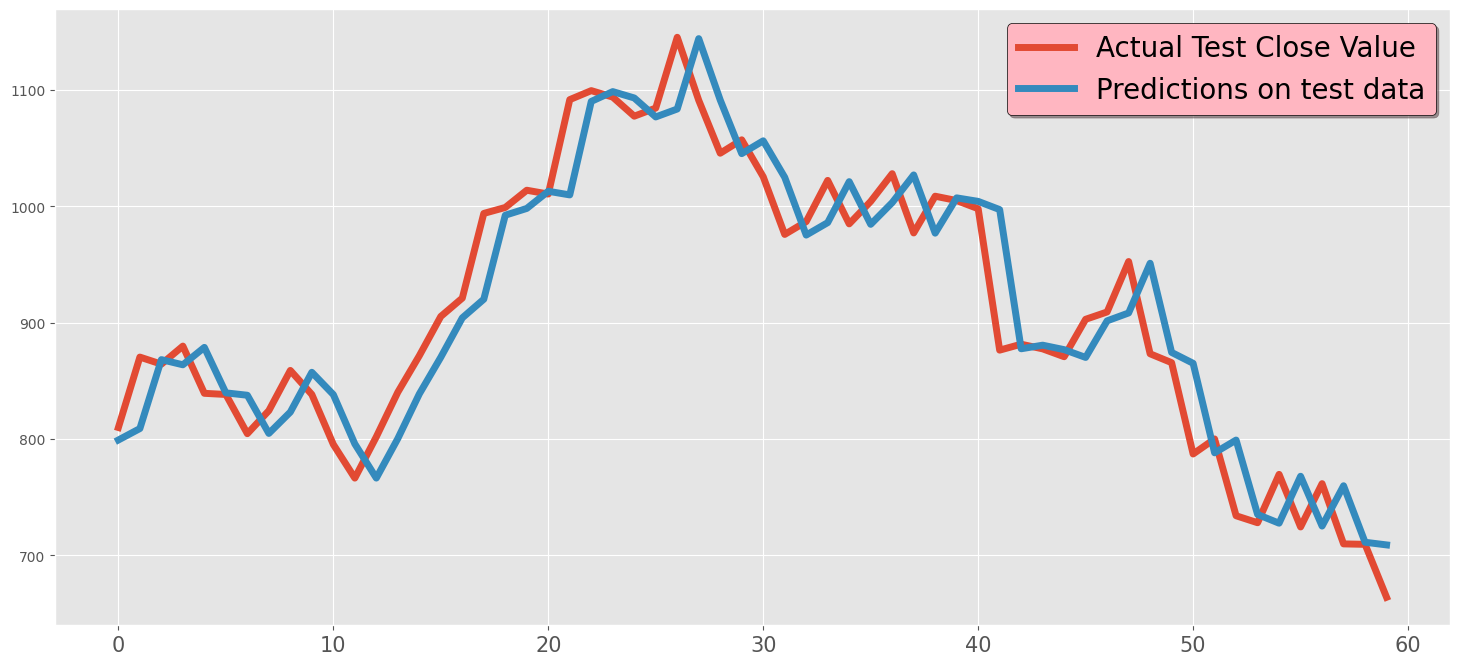

In [65]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, label = 'Actual Test Close Value', linewidth = 5)
plt.plot(range(len(predicted_data)), predicted_data, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()


In [66]:
# I have reset index before but here, I need original index on test data

test_data = df_close[-60:]
forecast_series = pd.Series(predicted_data, index = test_data.index)

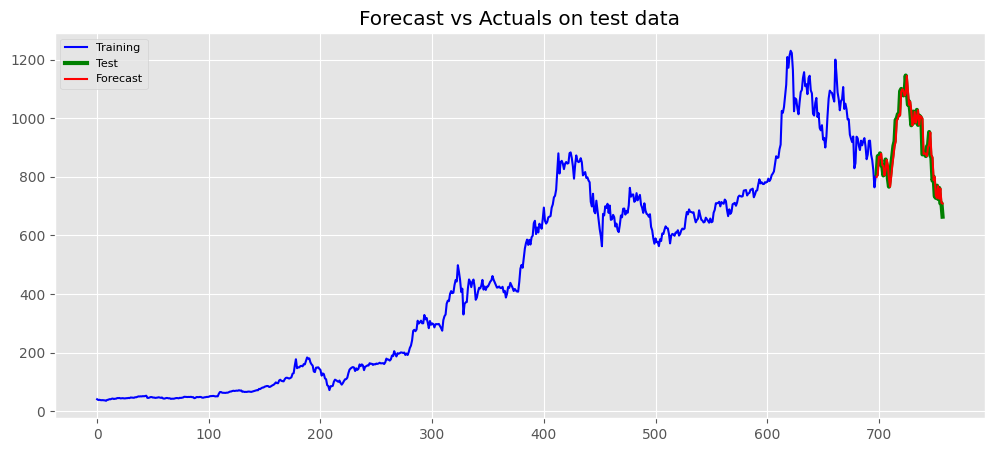

In [67]:
plt.figure(figsize=(12,5), dpi=100)

plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(forecast_series, label='Forecast', color = 'red')

plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize = 8)
plt.show()

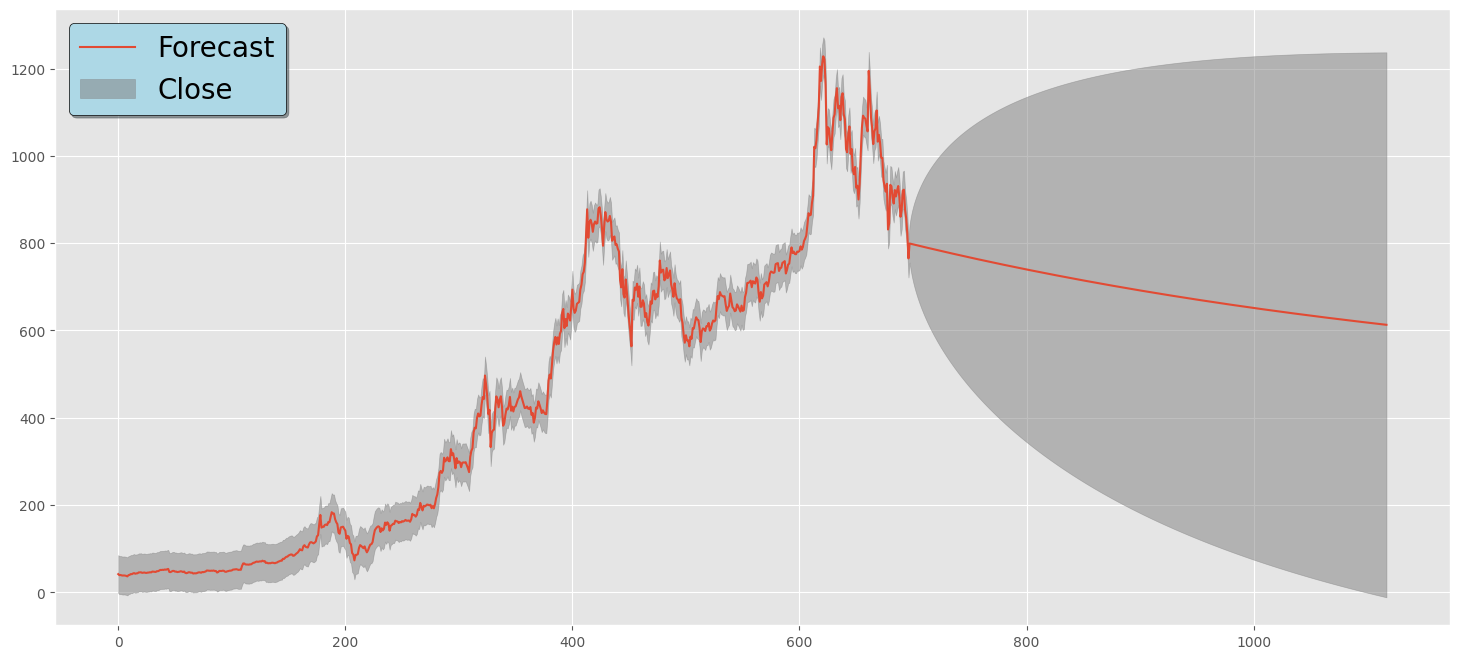

In [68]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)

model = ARIMA(history, order = (2,0,0))
model = model.fit()
plot_predict(result= model,start=1, end=len(df_close)+360, ax = ax1)

plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()


NOTE: **Grey** area showing' **Confidence interval**' and **Blue** line is the predicted/forecasted data.

# Implementing SARIMA/SARIMAX model

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(df_close, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

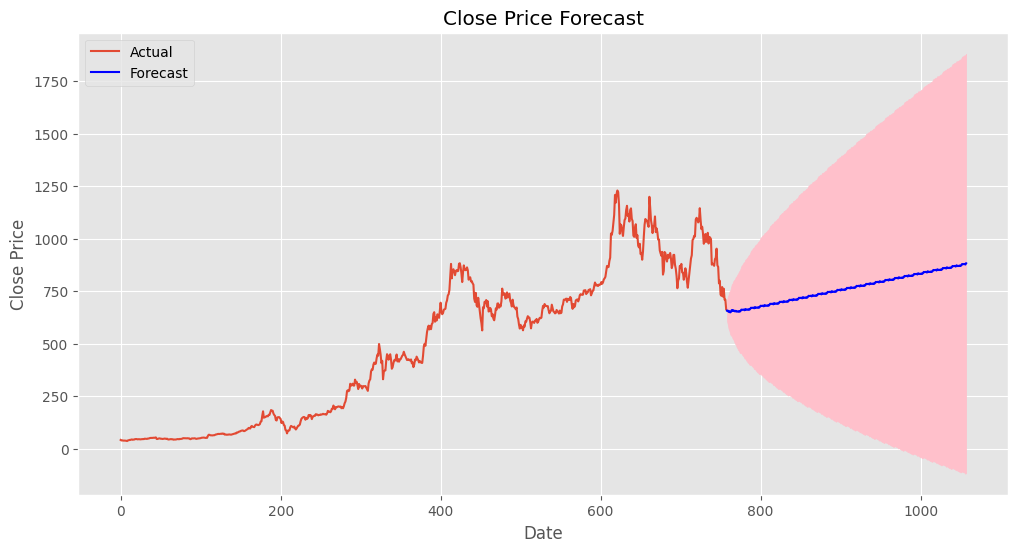

In [71]:
# Forecast future values
forecast_periods = 300  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_close, label='Actual')
plt.plot(forecast_mean, label='Forecast', color='blue')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')

plt.title("Close Price Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.legend()
plt.show()


# **NOTE:**
The actual Close Price data is in *Red* and the forecasted values is in *Blue*.

The pink shaded area represents the confidence interval around the forecast. This visualization helps us understand the expected future sales trends based on our SARIMA model.

In [72]:
observed = df_close[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')

MAE: 106.77484721406816
MSE: 22583.492466852418
RMSE: 150.2780505158768


In [73]:
train_data2 = df_close[0:-60]
test_data2 = df_close[-60:]

history2 = [x for x in train_data2]
predicted_data = list()

for i in range(len(test_data2)):

  model = SARIMAX(history2, order = (0,1,0), seasonal_order = (1,1,1,3))
  model = model.fit()
  pred = model.forecast()
  predicted_data.append(pred)
  history2.append(test_data2.iloc[i])

mse = mean_squared_error(test_data2, predicted_data)
print("RMSE of SARIMA model: ", np.sqrt(mse))


RMSE of SARIMA model:  39.73948208025767
